# Project Summary

### Predicting the fare of flight

As domestic air travel is getting more and more popular these days in India with various air ticket booking channels coming up online, travellers are trying to understand how these airline companies make decisions regarding ticket prices over time. Nowadays, airline corporations are using complex strategies and methods to assign airfare prices in a dynamic fashion. These strategies are taking into consideration several financial, marketing, commercial and social factors are closely connected with the ultimate airfare prices. Due to the high complexity of the pricing models applied by the airlines, it is very difficult for a customer to purchase an air ticket at the lowest price, since the price changes dynamically. For this reason, several techniques ready to provide the proper time to the customer to buy an air ticket by predicting the airfare price, are proposed recently. The majority of those methods are making use of sophisticated prediction models from the computational intelligence research field known as Machine Learning (ML). In this machine learning in python project there is only one module namely, User. User can login with valid credentials in order to access the web application. A traveller can access this module to get the future price prediction of individual airlines. The prediction will help a traveller to decide a specific airline as per his/her budget. Single entries of current or previous data can be made. This training set is used to train the algorithm for accurate predictions.

###  Importing libraries

In [2]:
# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning algorithms
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

# model validation
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

import warnings 
warnings.filterwarnings('ignore')

### Loading dataset

In [3]:
Flight = pd.read_excel('Flight_Fare.xlsx')
Flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


###  Basic checks

In [4]:
Flight.shape

(10683, 11)

In [5]:
Flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


###  Data cleaning

In [6]:
# checking for null values & dropping null values
Flight.dropna(inplace=True)
Flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
Flight.drop(["Route","Additional_Info"], axis=1, inplace=True)
Flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662


In [8]:
# Checking unique values in each columns
dict = {}
for i in Flight.columns:
    dict[i] = Flight[i].value_counts().shape
pd.DataFrame(dict, index =["Unique"]).transpose()

,Unique
Airline,12
Date_of_Journey,44
Source,5
Destination,6
Dep_Time,222
Arrival_Time,1343
Duration,368
Total_Stops,5
Price,1870


### EDA & Feature Engineering

In [9]:
# converting the object data type to date & object month type to month

Flight['day'] = pd.to_datetime(Flight.Date_of_Journey, format= '%d/%m/%Y').dt.day
Flight['month'] = pd.to_datetime(Flight.Date_of_Journey, format= '%d/%m/%Y').dt.month
Flight.drop(['Date_of_Journey'], axis=1, inplace=True)
Flight.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,day,month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [10]:
# converting the object Dep_time type into dep_hours & dep_mins

Flight['Dep_hour'] = pd.to_datetime(Flight.Dep_Time).dt.hour
Flight['Dep_min'] = pd.to_datetime(Flight.Dep_Time).dt.minute
Flight.drop(['Dep_Time'], axis=1, inplace=True)
Flight.head(5)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,day,month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,16,50


In [11]:
# converting the object arrival_time type into arrival_hours & arrival_mins

Flight['Arrival_hour'] = pd.to_datetime(Flight.Arrival_Time).dt.hour
Flight['Arrival_min'] = pd.to_datetime(Flight.Arrival_Time).dt.minute
Flight.drop(['Arrival_Time'], axis=1, inplace=True)
Flight.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [12]:
Flight['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
41h 20m      1
30h 15m      1
19h 50m      1
47h          1
28h 30m      1
Name: Duration, Length: 368, dtype: int64

In [13]:
# converting the object duration type into duration_in_mins

Flight['Dur_in_min'] = (pd.to_timedelta(Flight['Duration']).dt.seconds//60)

In [14]:
Flight.drop(['Duration'], axis=1,inplace=True)
Flight.head()

,Airline,Source,Destination,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_in_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,285


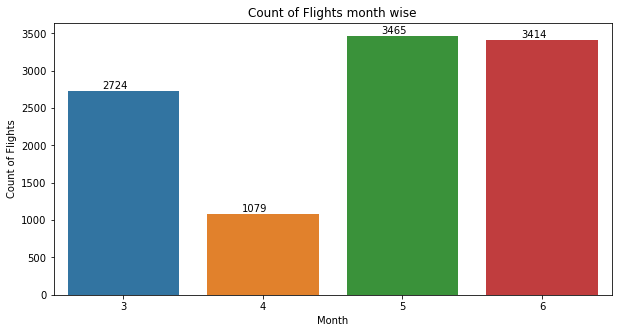

In [15]:
# Count of Flights month wise

plt.figure(figsize= (10,5))
plt.title("Count of Flights month wise")
ax = sns.countplot(x ='month', data = Flight)
plt.xlabel('Month')
plt.ylabel('Count of Flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25,p.get_height()+1), va='bottom',
                color= 'black')

In [16]:
Flight.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [17]:
Flight['Total_Stops'].replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)
Flight.head(5)

,Airline,Source,Destination,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_in_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285


### Handling Categorical data

In [18]:
Flight['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

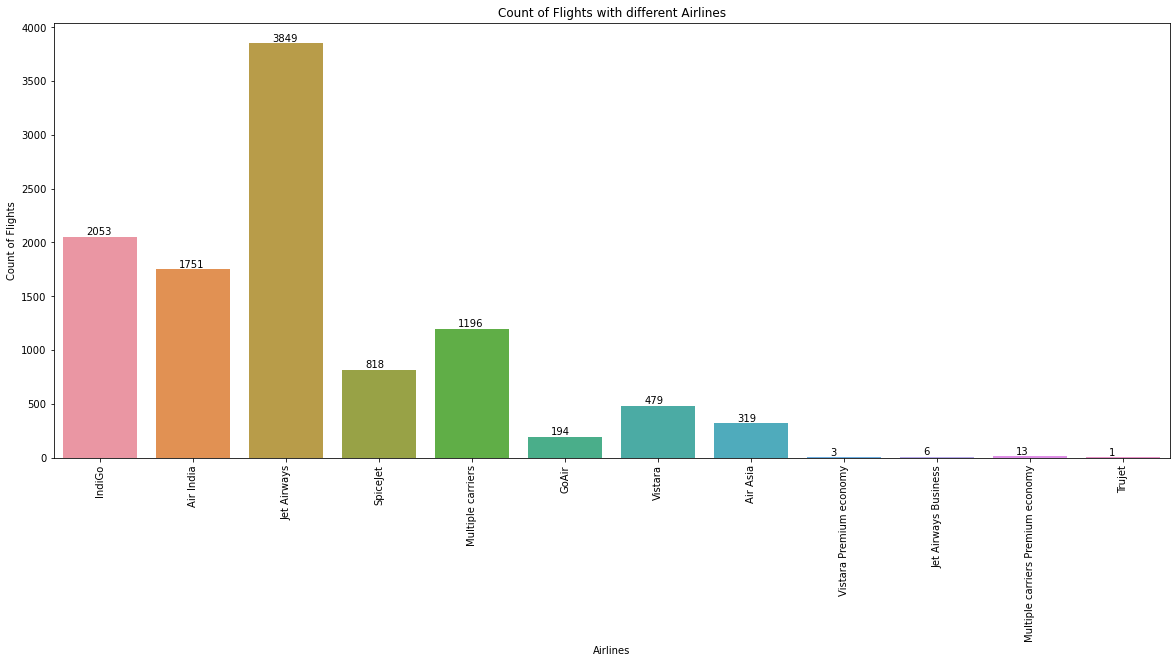

In [19]:
# Count of Flights with different Airlines

plt.figure(figsize= (20,8))
plt.title("Count of Flights with different Airlines")
ax = sns.countplot(x ='Airline', data = Flight)
plt.xlabel('Airlines')
plt.ylabel('Count of Flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25,p.get_height()+1), va='bottom',color= 'black')

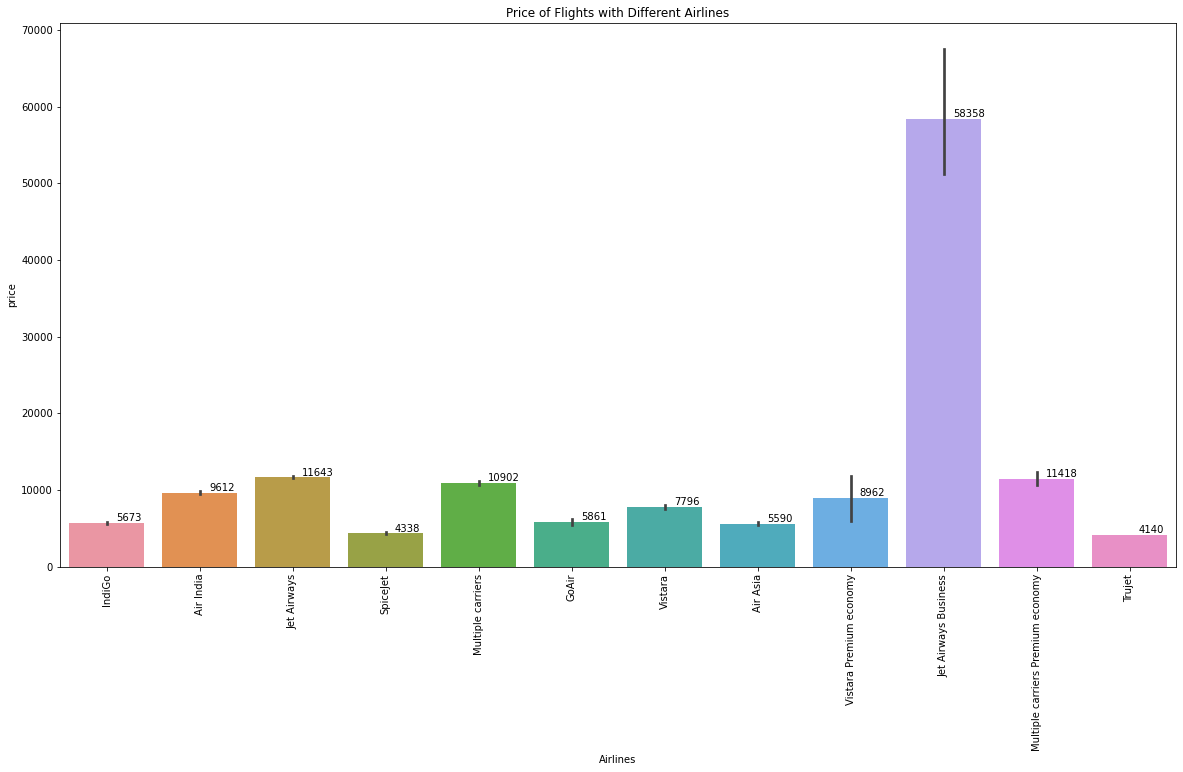

In [20]:
# Price of Flights with Different Airlines

plt.figure(figsize=(20,10))
plt.title("Price of Flights with Different Airlines")
ax = sns.barplot(Flight['Airline'],Flight['Price'])
plt.xlabel('Airlines')
plt.ylabel('price')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.5,p.get_height()+1), va='bottom',color= 'black')
plt.show()

In [21]:
Airline = Flight[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [22]:
Flight['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

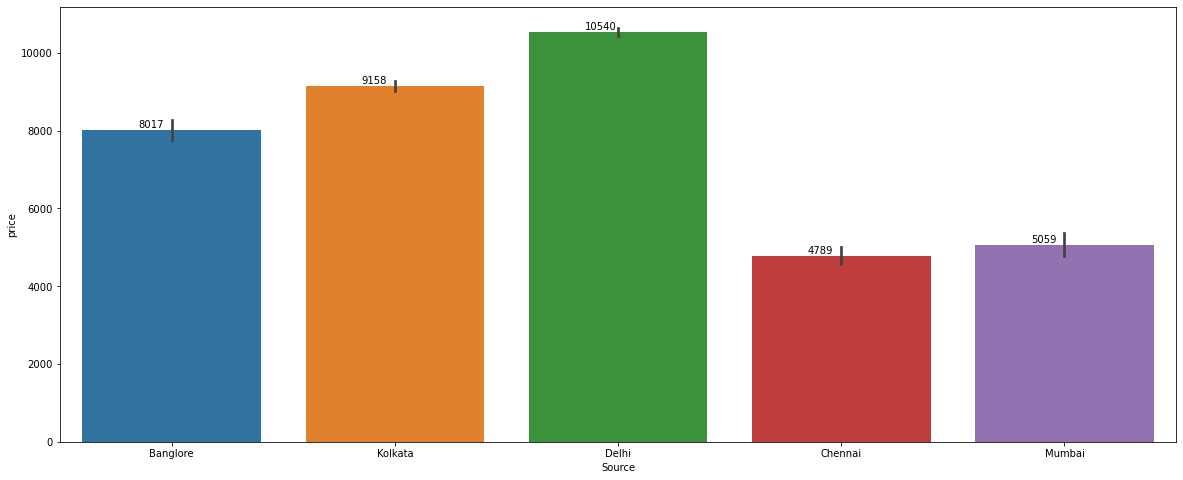

In [23]:
# Price of Flights w.r.t Different Sources

plt.figure(figsize=(20,8))
ax = sns.barplot(Flight['Source'],Flight['Price'])
plt.xlabel('Source')
plt.ylabel('price')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25,p.get_height()+1), va='bottom',
                color= 'black')
plt.show()

In [24]:
Soruce = Flight[['Source']]
Source = pd.get_dummies(Soruce, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
Flight['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

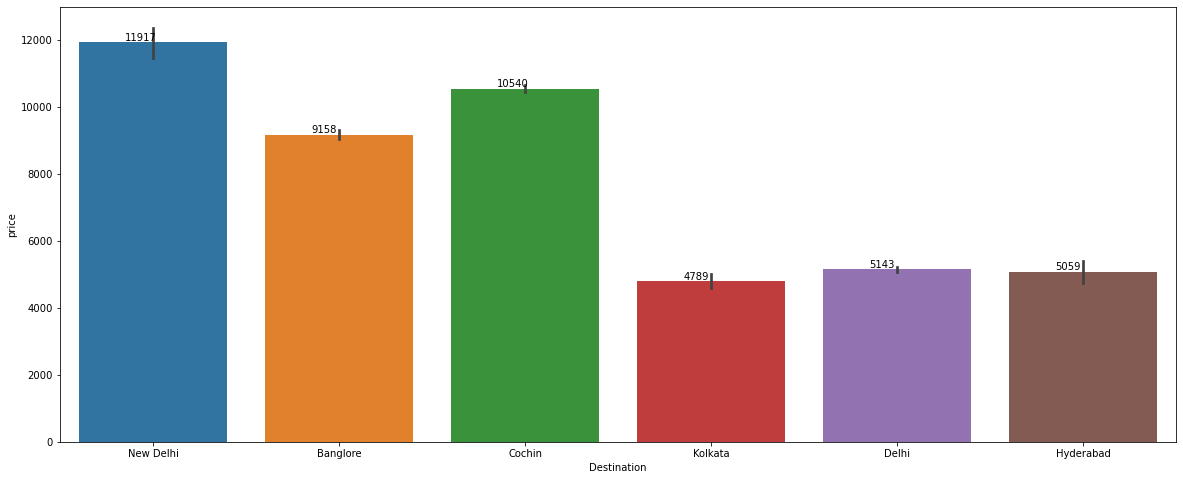

In [26]:
# Price of Flights w.r.t different destinations

plt.figure(figsize=(20,8))
ax = sns.barplot(Flight['Destination'],Flight['Price'])
plt.xlabel('Destination')
plt.ylabel('price')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25,p.get_height()+1), va='bottom',
                color= 'black')
plt.show()

In [27]:
Destination = Flight[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
# Concatenate dataframe 
Data_train = pd.concat([Flight, Airline, Source, Destination],axis=1)
Data_train.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [29]:
Data_train.shape

(10682, 29)

In [30]:
Data_train.head(3)

,Total_Stops,Price,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_in_min,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,170,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,445,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,1140,0,...,0,0,1,0,0,1,0,0,0,0


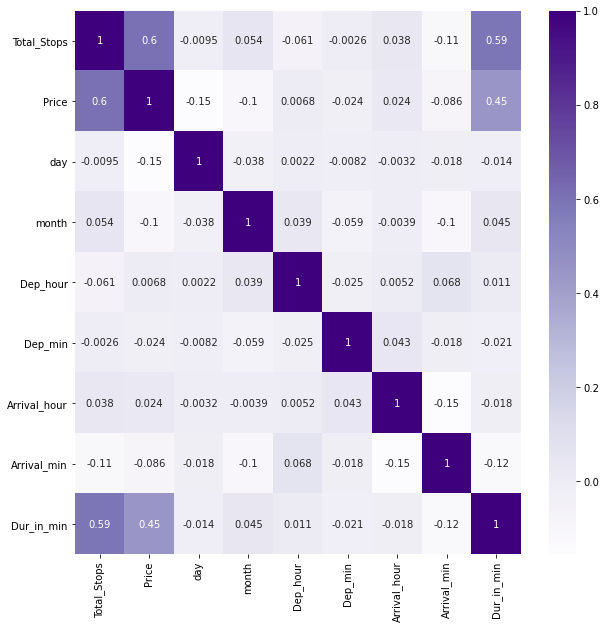

In [31]:
# Checking Correlation between all features

plt.figure(figsize=(10,10))
sns.heatmap(Flight.corr(), annot=True, cmap='Purples')
plt.show()

### Choosing input and output

In [32]:
X = Data_train.drop(['Price'],axis =1)
y = Data_train['Price']

In [33]:
X.head(3)

,Total_Stops,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Dur_in_min,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,170,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,445,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,1140,0,0,...,0,0,1,0,0,1,0,0,0,0


In [34]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Feature Selection

In [35]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [36]:
print(model.feature_importances_)

[2.43352295e-01 1.43449522e-01 5.51583997e-02 2.62699006e-02
 2.52234041e-02 2.99273077e-02 2.24490062e-02 1.06011713e-01
 1.20704197e-02 2.10043441e-03 1.94667802e-02 1.41634652e-01
 6.71160370e-02 1.70948146e-02 8.54189559e-04 3.51404546e-03
 1.38538264e-04 5.64415510e-03 7.01599198e-05 4.87621730e-04
 1.16599198e-02 3.48105219e-03 7.29472028e-03 9.25187908e-03
 1.38856630e-02 7.29422578e-03 4.29014597e-04 2.46701299e-02]


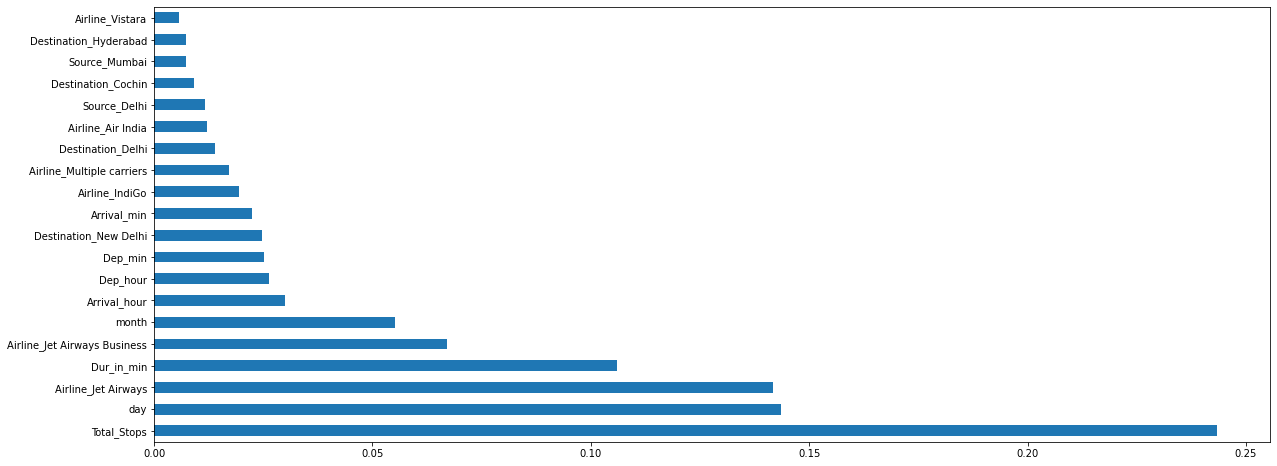

In [37]:
# Graph of Feature importance
plt.figure(figsize = (20,8))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

###  Splitting the data into training data and test data

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, test_size=0.2,train_size=0.8)

###  Model Building

In [133]:
# RandomForest Regressor

model1 = RandomForestRegressor()
model1.fit(X_train,y_train)
y_predict = model1.predict(X_test)

In [134]:
model1.score(X_train,y_train)

0.9530183509910906

In [135]:
model1.score(X_test,y_test)

0.8395389435818625

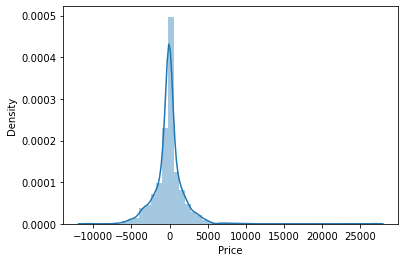

In [136]:
sns.distplot(y_test-y_predict)
plt.show()

In [137]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predict))
print('MSE:', metrics.mean_squared_error(y_test,y_predict))
print('RSME:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE: 1155.6041680966698
MSE: 3459870.336322383
RSME: 1860.0726696348138


In [138]:
metrics.r2_score(y_test,y_predict)

0.8395389435818625

In [139]:
# DecisionTree Regressor

model2 = DecisionTreeRegressor()
model2.fit(X_train,y_train)
y_predict = model2.predict(X_test)

In [140]:
model2.score(X_train,y_train)

0.9691496355350125

In [141]:
model2.score(X_test,y_test)

0.7560040993166501

In [142]:
print('MAE:', metrics.mean_absolute_error(y_test,y_predict))
print('MSE:', metrics.mean_squared_error(y_test,y_predict))
print('RSME:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE: 1340.822453595383
MSE: 5261053.353398976
RSME: 2293.698618694046


In [143]:
metrics.r2_score(y_test,y_predict)

0.7560040993166501

Therefore, we can see that the RandomForestRegressor performs better than DecisionTreeRegressor,
So lets do Hyperparameter tuning for RandomForestRegressor

### Hyperparameter tuning

In [156]:
from sklearn.model_selection import RandomizedSearchCV

In [145]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(100,1200,12)]

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, 6)]

# Minimum number of samples required to split a node
min_samples_split = np.arange(1,101)

# Minimum number of samples required at each leaf node
min_samples_leaf = np.arange(1,11)

In [146]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [147]:
random_regressor = RandomizedSearchCV(RandomForestRegressor(), random_grid,n_iter=20, 
                                      scoring='neg_mean_squared_error',
                                      cv = 5, verbose=2, random_state= 42, n_jobs = 1)

In [148]:
random_regressor.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=64, n_estimators=300; total time=   3.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=64, n_estimators=300; total time=   3.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=64, n_estimators=300; total time=   3.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=64, n_estimators=300; total time=   3.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=64, n_estimators=300; total time=   3.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=95, n_estimators=500; total time=   4.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=95, n_estimators=500; total time=   4.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=95, n_es

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   3.8s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=65, n_estimators=200; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=65, n_estimators=200; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=65, n_estimators=200; total time=   1.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=65, n_estimators=200; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=65, n_estimators=200; total time=   1.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=78, n_estimators=1200; total time=  13.3s
[CV] END max_depth=15, max_features=a

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100]),
                                       

In [149]:
random_regressor.best_params_

{'n_estimators': 300,
 'min_samples_split': 64,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [150]:
prediction = random_regressor.predict(X_test)
prediction

array([16314.53012503,  6641.25962752,  8474.81044485, ...,
        6104.74898457, 12079.70185172, 12304.57239065])

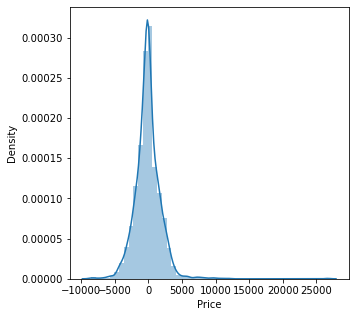

In [151]:
plt.figure(figsize = (5,5))
sns.distplot(y_test-prediction)
plt.show()

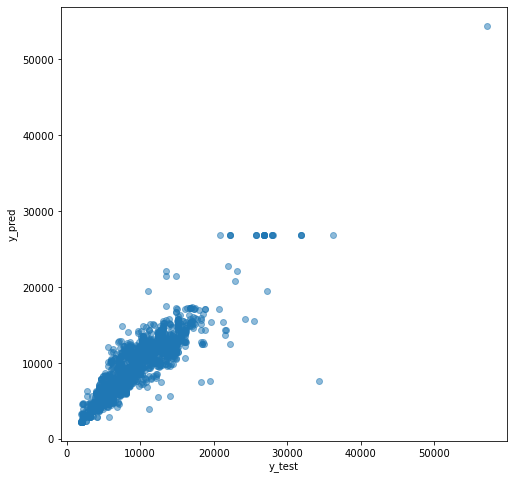

In [152]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [153]:
model1_rfr = RandomForestRegressor(n_estimators= 300,min_samples_split= 64,
                                   min_samples_leaf= 2,max_features= 'auto',max_depth= 30)
model1_rfr

RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=64,
                      n_estimators=300)

In [154]:
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.8411842996604793

In [155]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 1304.988257831582
MSE: 3719054.3302207184
RMSE: 1928.4849831462827


###  Save model & Predictions

In [160]:
import joblib 
joblib.dump(model1,'flightfare_model1.pkl')

['flightfare_model1.pkl']

In [161]:
final = joblib.load('flightfare_model1.pkl')
final

RandomForestRegressor()

In [162]:
y_prediction = final.predict(X_test)

In [163]:
metrics.r2_score(y_test,y_prediction)

0.8411842996604793